In [48]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt


# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
# 显示负号
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 导入数据
df51 = pd.read_csv('./问题3支撑材料/5月1日数据.csv', encoding='gbk')
df52 = pd.read_csv('./问题3支撑材料/5月2日数据.csv', encoding='gbk')
df53 = pd.read_csv('./问题3支撑材料/5月3日数据.csv', encoding='gbk')
df54 = pd.read_csv('./问题3支撑材料/5月4日数据.csv', encoding='gbk')
df55 = pd.read_csv('./问题3支撑材料/5月5日数据.csv', encoding='gbk')

df = pd.read_csv('./题目及附件/附件2.csv', encoding='gbk')

# 提取df中的日期为2024年4月1日至2024年4月6日的数据
df['时间'] = pd.to_datetime(df['时间'])
mask = (df['时间'] >= '2024-04-01') & (df['时间'] <= '2024-04-06')
df_filtered = df.loc[mask]

# 查看数据
df_filtered.head()

,方向,时间,车牌号,交叉口
0,3,2024-04-03 14:39:08.632,AF5B7CEM,环西路-纬中路
1,1,2024-04-03 17:45:32.316,BK2IA84,环西路-纬中路
2,3,2024-04-03 15:09:04.087,AF4EC7FK,环西路-纬中路
3,2,2024-04-03 11:49:03.665,AF4MBB6,环西路-纬中路
4,3,2024-04-01 11:47:49.391,CBA7KCG,环西路-纬中路


In [49]:
# 将4月1日至4月5日的数据分开保存为csv文件
df41 = df_filtered[df_filtered['时间'].dt.strftime('%Y-%m-%d') == '2024-04-01']
df42 = df_filtered[df_filtered['时间'].dt.strftime('%Y-%m-%d') == '2024-04-02']
df43 = df_filtered[df_filtered['时间'].dt.strftime('%Y-%m-%d') == '2024-04-03']
df44 = df_filtered[df_filtered['时间'].dt.strftime('%Y-%m-%d') == '2024-04-04']
df45 = df_filtered[df_filtered['时间'].dt.strftime('%Y-%m-%d') == '2024-04-05']


In [50]:
# 判断每天都有多少个数据量
print("4月1日数据量：", len(df41))
print("4月2日数据量：", len(df42))
print("4月3日数据量：", len(df43))
print("4月4日数据量：", len(df44))
print("4月5日数据量：", len(df45))

4月1日数据量： 228909
4月2日数据量： 223217
4月3日数据量： 254325
4月4日数据量： 279576
4月5日数据量： 265923


In [51]:
# 判断每天的数据中是否存在“无车牌”的数据
print("4月1日无车牌数据量：", len(df41[df41['车牌号'] == '无车牌']))
print("4月2日无车牌数据量：", len(df42[df42['车牌号'] == '无车牌']))
print("4月3日无车牌数据量：", len(df43[df43['车牌号'] == '无车牌']))
print("4月4日无车牌数据量：", len(df44[df44['车牌号'] == '无车牌']))
print("4月5日无车牌数据量：", len(df45[df45['车牌号'] == '无车牌']))

4月1日无车牌数据量： 5828
4月2日无车牌数据量： 6050
4月3日无车牌数据量： 6494
4月4日无车牌数据量： 6741
4月5日无车牌数据量： 5380


In [52]:
# 每天的无车牌的数据作为异常值删除
df41 = df41[df41['车牌号'] != '无车牌']
df42 = df42[df42['车牌号'] != '无车牌']
df43 = df43[df43['车牌号'] != '无车牌']
df44 = df44[df44['车牌号'] != '无车牌']
df45 = df45[df45['车牌号'] != '无车牌']

# 保存成csv文件
df41.to_csv('./问题4支撑材料/4月1日数据.csv', index=False, encoding='gbk')
df42.to_csv('./问题4支撑材料/4月2日数据.csv', index=False, encoding='gbk')
df43.to_csv('./问题4支撑材料/4月3日数据.csv', index=False, encoding='gbk')
df44.to_csv('./问题4支撑材料/4月4日数据.csv', index=False, encoding='gbk')
df45.to_csv('./问题4支撑材料/4月5日数据.csv', index=False, encoding='gbk')

# 判断每天的数据量
print("4月1日数据量：", len(df41))
print("4月2日数据量：", len(df42))
print("4月3日数据量：", len(df43))
print("4月4日数据量：", len(df44))
print("4月5日数据量：", len(df45))

4月1日数据量： 223081
4月2日数据量： 217167
4月3日数据量： 247831
4月4日数据量： 272835
4月5日数据量： 260543


In [53]:
# 查看列名
print("4月1日数据列名：", df41.columns.tolist())
print("4月2日数据列名：", df42.columns.tolist())
print("4月3日数据列名：", df43.columns.tolist())
print("4月4日数据列名：", df44.columns.tolist())
print("4月5日数据列名：", df45.columns.tolist())

4月1日数据列名： ['方向', '时间', '车牌号', '交叉口']
4月2日数据列名： ['方向', '时间', '车牌号', '交叉口']
4月3日数据列名： ['方向', '时间', '车牌号', '交叉口']
4月4日数据列名： ['方向', '时间', '车牌号', '交叉口']
4月5日数据列名： ['方向', '时间', '车牌号', '交叉口']


五一黄金周每天车流量统计：
           日期     车流量
0  2024-05-01  300522
1  2024-05-02  305200
2  2024-05-03  286805
3  2024-05-04  248614
4  2024-05-05  240015


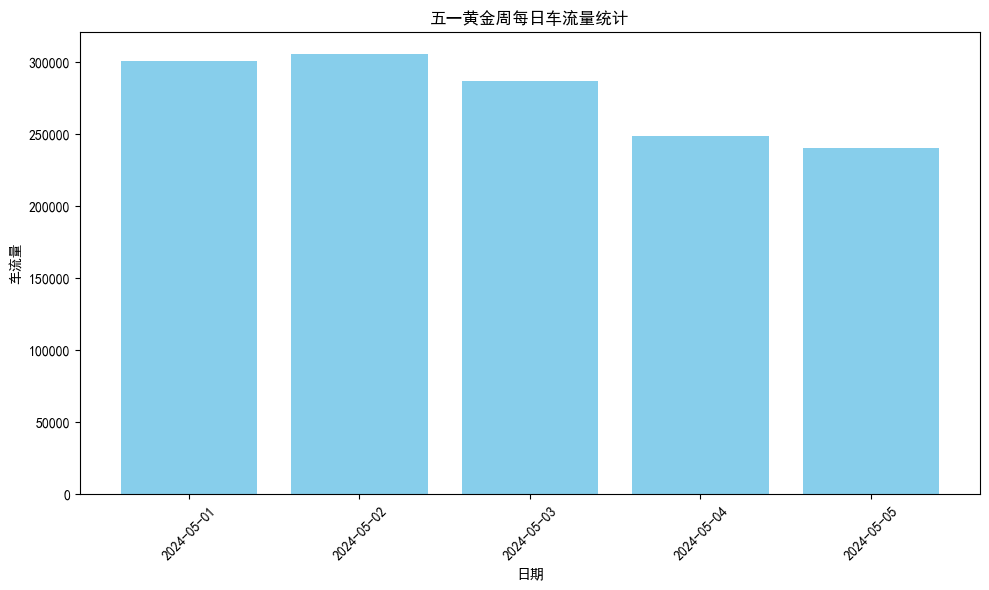

In [54]:
# 统计五一黄金周每天的车流量
import pandas as pd
import glob
import matplotlib.pyplot as plt

# 读取所有5月的数据文件
files = glob.glob('./问题3支撑材料/5月*.csv')

# 创建一个空的DataFrame来存储所有数据
all_data = pd.DataFrame()

# 读取所有文件
for file in files:
    df = pd.read_csv(file, encoding='gbk')
    # 确保时间列是datetime类型，使用mixed格式处理不一致的时间格式
    df['时间'] = pd.to_datetime(df['时间'], format='mixed')
    all_data = pd.concat([all_data, df], ignore_index=True)

# 按日期统计车流量
daily_traffic = all_data.groupby(all_data['时间'].dt.date).size().reset_index(name='车流量')

daily_traffic.columns = ['日期', '车流量']

# 查看结果
print("五一黄金周每天车流量统计：")
print(daily_traffic)

# 绘制车流量柱状图
plt.figure(figsize=(10, 6))
plt.bar(daily_traffic['日期'].astype(str), daily_traffic['车流量'], color='skyblue')
plt.xlabel('日期')
plt.ylabel('车流量')
plt.title('五一黄金周每日车流量统计')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4月1日到4月5日每天车流量统计：
           日期     车流量
0  2024-04-01  223081
1  2024-04-02  217167
2  2024-04-03  247831
3  2024-04-04  272835
4  2024-04-05  260543


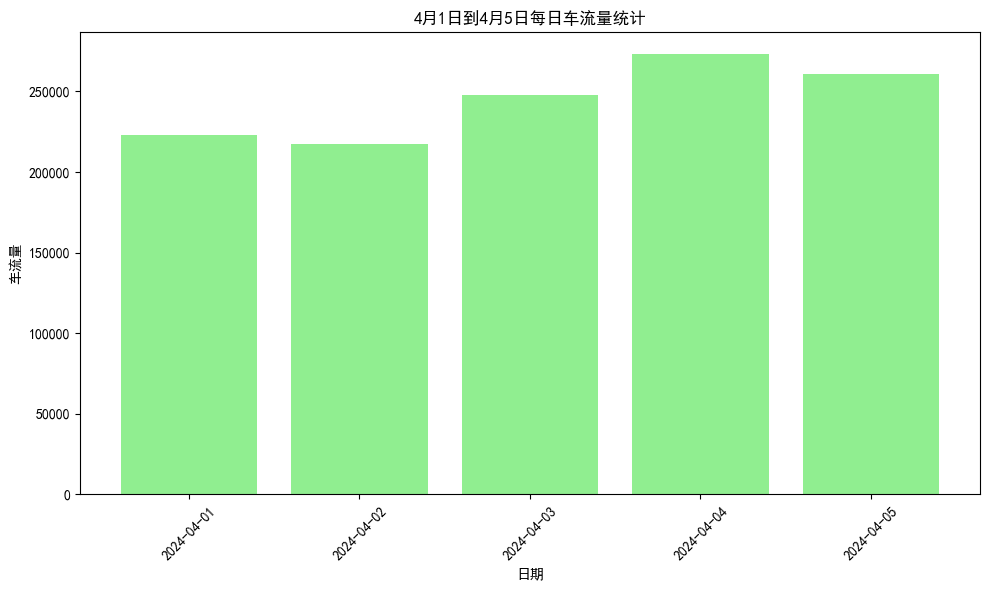

In [55]:
# 统计4月1日到4月5日每天的车流量并绘制图表
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 读取所有4月的数据文件
files = ['./问题4支撑材料/4月1日数据.csv', './问题4支撑材料/4月2日数据.csv', 
         './问题4支撑材料/4月3日数据.csv', './问题4支撑材料/4月4日数据.csv', 
         './问题4支撑材料/4月5日数据.csv']

# 创建一个空的DataFrame来存储所有数据
all_data = pd.DataFrame()

# 读取所有文件
for file in files:
    df = pd.read_csv(file, encoding='gbk')
    # 确保时间列是datetime类型，使用mixed格式处理不一致的时间格式
    df['时间'] = pd.to_datetime(df['时间'], format='mixed')
    all_data = pd.concat([all_data, df], ignore_index=True)

# 按日期统计车流量
daily_traffic = all_data.groupby(all_data['时间'].dt.date).size().reset_index(name='车流量')

daily_traffic.columns = ['日期', '车流量']

# 查看结果
print("4月1日到4月5日每天车流量统计：")
print(daily_traffic)

# 绘制车流量柱状图
plt.figure(figsize=(10, 6))
plt.bar(daily_traffic['日期'].astype(str), daily_traffic['车流量'], color='lightgreen')
plt.xlabel('日期')
plt.ylabel('车流量')
plt.title('4月1日到4月5日每日车流量统计')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd
import os
import glob

# 默认道路长度 (单位: km)
DEFAULT_ROAD_LENGTH = 3.5

# 定义时间段 (这里以小时为单位)
TIME_INTERVAL = 1  # 1小时

# 数据目录
DATA_DIR = r'F:\Math_model\CUMCM2024Problems\E\问题4支撑材料'

# 获取所有CSV文件路径
csv_files = glob.glob(os.path.join(DATA_DIR, "*.csv"))

# 初始化结果列表
results = []

for file_path in csv_files:
    # 读取数据
    df = pd.read_csv(file_path, encoding='gbk')

    
    # 获取日期
    date_str = os.path.basename(file_path).replace("数据.csv", "")
    
    # 按时间段分组 (这里简化为按小时分组)
    df['时间'] = pd.to_datetime(df['时间'], format='mixed')
    df['时间段'] = df['时间'].dt.floor(f'{TIME_INTERVAL}h')
    
    # 按交叉口和时间段分组统计车辆数
    grouped = df.groupby(['交叉口', '时间段']).size().reset_index(name='车辆数')
    
    # 计算车辆密度 (车辆数/km/小时)
    grouped['车辆密度'] = grouped['车辆数'] / (DEFAULT_ROAD_LENGTH * TIME_INTERVAL)
    
    # 添加日期信息
    grouped['日期'] = date_str
    
    # 添加到结果列表
    results.append(grouped)

# 合并所有结果
final_result = pd.concat(results, ignore_index=True)

# 保存结果到CSV文件
final_result.to_csv('./问题4支撑材料/4月期间车辆密度计算结果.csv', index=False, encoding='gbk')

print("车辆密度计算完成，结果已保存至 '4月期间车辆密度计算结果.csv'")


车辆密度计算完成，结果已保存至 '4月期间车辆密度计算结果.csv'


In [57]:
# 五一黄金周车辆密度计算（简化版）
import pandas as pd

# 定义计算车辆密度的函数
def calculate_daily_density(df, date_str):
    """计算每天的车辆密度"""
    # 删除无车牌数据
    df = df[df['车牌号'] != '无车牌'].copy()
    
    # 转换时间格式
    df['时间'] = pd.to_datetime(df['时间'], format='mixed')
    
    # 提取小时
    df['小时'] = df['时间'].dt.hour
    
    # 按交叉口和小时分组统计车辆数
    density_df = df.groupby(['交叉口', '小时']).size().reset_index(name='车辆数')
    
    # 计算车辆密度（车辆数/小时）
    density_df['车辆密度'] = density_df['车辆数'] / 1.0
    
    # 创建时间段列
    density_df['时间段'] = pd.to_datetime(date_str) + pd.to_timedelta(density_df['小时'], unit='h')
    density_df['时间段'] = density_df['时间段'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # 添加日期列
    density_df['日期'] = date_str
    
    # 重新排列列顺序
    density_df = density_df[['交叉口', '时间段', '车辆数', '车辆密度', '日期']]
    
    return density_df

# 计算每天的车辆密度
may_files = {
    '2024-05-01': './问题3支撑材料/5月1日数据.csv',
    '2024-05-02': './问题3支撑材料/5月2日数据.csv',
    '2024-05-03': './问题3支撑材料/5月3日数据.csv',
    '2024-05-04': './问题3支撑材料/5月4日数据.csv',
    '2024-05-05': './问题3支撑材料/5月5日数据.csv'
}

all_density_data = []

for date_str, file_path in may_files.items():
    # 读取数据
    df = pd.read_csv(file_path, encoding='gbk')
    
    # 计算车辆密度
    density_df = calculate_daily_density(df, date_str)
    
    # 保存每日数据
    date_name = date_str.replace('2024-', '').replace('-', '月') + '日'
    output_file = f'./问题4支撑材料/{date_name}车辆密度计算结果.csv'
    density_df.to_csv(output_file, index=False, encoding='utf-8-sig')
    
    all_density_data.append(density_df)

# 合并所有数据
all_density = pd.concat(all_density_data, ignore_index=True)
all_density.to_csv('./问题4支撑材料/五一黄金周车辆密度计算结果.csv', index=False, encoding='utf-8-sig')

print("五一黄金周车辆密度计算完成！")

五一黄金周车辆密度计算完成！


In [62]:
# 交通密度对比可视化脚本
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
import os

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 文件路径
april_file = './问题4支撑材料/4月期间车辆密度计算结果.csv'
may_file = './问题4支撑材料/五一黄金周车辆密度计算结果.csv'

# 读取数据
print("正在读取数据...")
encodings = ['utf-8', 'gbk', 'utf-8-sig', 'latin-1']  # 尝试多种编码

for encoding in encodings:
    try:
        df_april = pd.read_csv(april_file, encoding=encoding)
        df_may = pd.read_csv(may_file, encoding=encoding)
        print(f"成功使用 {encoding} 编码读取数据")
        break
    except UnicodeDecodeError:
        print(f"使用 {encoding} 编码读取失败")
        continue
else:
    # 如果所有编码都失败，则使用latin-1编码并忽略错误
    df_april = pd.read_csv(april_file, encoding='latin-1', errors='ignore')
    df_may = pd.read_csv(may_file, encoding='latin-1', errors='ignore')
    print("使用latin-1编码并忽略错误读取数据")

# 重命名列名，确保一致性
df_april.columns = ['交叉口', '时间段', '车辆数', '车辆密度', '日期']
df_may.columns = ['交叉口', '时间段', '车辆数', '车辆密度', '日期']

# 将时间段转换为小时
df_april['小时'] = pd.to_datetime(df_april['时间段']).dt.hour
df_may['小时'] = pd.to_datetime(df_may['时间段']).dt.hour

# 创建输出目录
output_dir = './交通密度对比结果'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. 整体交通密度对比
print("正在绘制整体交通密度对比...")
plt.figure(figsize=(15, 8))

# 计算每小时的平均交通密度
april_hourly = df_april.groupby('小时')['车辆密度'].mean()
may_hourly = df_may.groupby('小时')['车辆密度'].mean()

# 绘制对比图
plt.subplot(2, 2, 1)
x = range(24)
plt.plot(x, april_hourly, marker='o', linewidth=2, label='4月期间', color='#1f77b4')
plt.plot(x, may_hourly, marker='s', linewidth=2, label='五一黄金周', color='#ff7f0e')
plt.xlabel('小时')
plt.ylabel('平均车辆密度')
plt.title('4月期间 vs 五一黄金周 - 24小时交通密度对比')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# 2. 各交叉口交通密度对比（选择前6个最繁忙的交叉口）
# 2. 各交叉口交通密度对比（选择前6个最繁忙的交叉口）
print("正在绘制各交叉口交通密度对比...")
top_intersections = ['环西路-纬中路', '经中路-纬中路', '经一路-纬中路', '环东路-纬中路', '经三路-纬中路', '纬中路-景区出入口']

plt.subplot(2, 2, 2)
selected_april = df_april[df_april['交叉口'].isin(top_intersections)]
selected_may = df_may[df_may['交叉口'].isin(top_intersections)]

# 计算每个交叉口的平均交通密度
april_intersection = selected_april.groupby('交叉口')['车辆密度'].mean()
may_intersection = selected_may.groupby('交叉口')['车辆密度'].mean()

# 确保两个序列具有相同的索引
intersection_index = top_intersections
april_intersection = april_intersection.reindex(intersection_index, fill_value=0)
may_intersection = may_intersection.reindex(intersection_index, fill_value=0)

# 创建对比数据框
comparison_df = pd.DataFrame({
    '4月期间': april_intersection,
    '五一黄金周': may_intersection
})

# 绘制柱状图
x = np.arange(len(top_intersections))
width = 0.35

plt.bar(x - width/2, comparison_df['4月期间'], width, label='4月期间', color='#1f77b4', alpha=0.8)
plt.bar(x + width/2, comparison_df['五一黄金周'], width, label='五一黄金周', color='#ff7f0e', alpha=0.8)

plt.xlabel('交叉口')
plt.ylabel('平均车辆密度')
plt.title('主要交叉口交通密度对比')
plt.xticks(x, top_intersections, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
# 3. 交通密度分布对比
plt.subplot(2, 2, 3)
plt.hist(df_april['车辆密度'], bins=30, alpha=0.7, label='4月期间', color='#1f77b4', density=True)
plt.hist(df_may['车辆密度'], bins=30, alpha=0.7, label='五一黄金周', color='#ff7f0e', density=True)
plt.xlabel('车辆密度')
plt.ylabel('密度')
plt.title('交通密度分布对比')
plt.legend()

# 4. 交通密度倍数关系
plt.subplot(2, 2, 4)
# 计算五一相对于4月的倍数
ratio = may_hourly / april_hourly
plt.bar(range(24), ratio, color='#2ca02c', alpha=0.8)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='基准线(1倍)')
plt.xlabel('小时')
plt.ylabel('五一/4月 密度倍数')
plt.title('五一期间相对于4月的交通密度倍数')
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/交通密度综合对比图.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. 创建详细的交叉口对比图
print("正在创建详细的交叉口对比图...")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, intersection in enumerate(top_intersections):
    ax = axes[idx]
    
    # 获取该交叉口的数据
    april_data = df_april[df_april['交叉口'] == intersection].groupby('小时')['车辆密度'].mean()
    may_data = df_may[df_may['交叉口'] == intersection].groupby('小时')['车辆密度'].mean()
    
    # 检查数据是否存在
    if len(april_data) > 0 or len(may_data) > 0:
        # 创建完整的小时序列(0-23)
        hours = range(24)
        april_values = [april_data.get(hour, 0) for hour in hours]
        may_values = [may_data.get(hour, 0) for hour in hours]
        
        ax.plot(hours, april_values, marker='o', label='4月期间', linewidth=2)
        ax.plot(hours, may_values, marker='s', label='五一黄金周', linewidth=2)
    else:
        # 如果没有数据，显示提示文本
        ax.text(0.5, 0.5, '无数据', transform=ax.transAxes, ha='center', va='center')
    
    ax.set_title(intersection, fontsize=12)
    ax.set_xlabel('小时')
    ax.set_ylabel('车辆密度')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 24, 3))

plt.suptitle('各主要交叉口24小时交通密度详细对比', fontsize=16)
plt.tight_layout()
plt.savefig(f'{output_dir}/各交叉口详细对比图.png', dpi=300, bbox_inches='tight')
plt.close()
# 6. 创建统计汇总表
print("正在创建统计汇总...")
summary_stats = pd.DataFrame({
    '指标': ['平均交通密度', '最大交通密度', '最小交通密度', '标准差', '总数据点数'],
    '4月期间': [
        df_april['车辆密度'].mean(),
        df_april['车辆密度'].max(),
        df_april['车辆密度'].min(),
        df_april['车辆密度'].std(),
        len(df_april)
    ],
    '五一黄金周': [
        df_may['车辆密度'].mean(),
        df_may['车辆密度'].max(),
        df_may['车辆密度'].min(),
        df_may['车辆密度'].std(),
        len(df_may)
    ]
})

# 保存统计汇总
summary_stats.to_csv(f'{output_dir}/交通密度统计汇总.csv', index=False, encoding='gbk')

# 7. 创建热力图
print("正在创建热力图...")
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 准备热力图数据
april_heatmap = df_april.pivot_table(values='车辆密度', index='交叉口', columns='小时', aggfunc='mean')
may_heatmap = df_may.pivot_table(values='车辆密度', index='交叉口', columns='小时', aggfunc='mean')

# 选择前10个最繁忙的交叉口进行热力图展示
top_10_april = df_april.groupby('交叉口')['车辆密度'].mean().nlargest(10).index
top_10_may = df_may.groupby('交叉口')['车辆密度'].mean().nlargest(10).index

april_heatmap_top = april_heatmap.loc[top_10_april]
may_heatmap_top = may_heatmap.loc[top_10_may]

# 绘制热力图
sns.heatmap(april_heatmap_top, cmap='Blues', ax=ax1, cbar_kws={'label': '车辆密度'})
ax1.set_title('4月期间交通密度热力图')
ax1.set_xlabel('小时')
ax1.set_ylabel('交叉口')

sns.heatmap(may_heatmap_top, cmap='Oranges', ax=ax2, cbar_kws={'label': '车辆密度'})
ax2.set_title('五一黄金周交通密度热力图')
ax2.set_xlabel('小时')
ax2.set_ylabel('交叉口')

plt.tight_layout()
plt.savefig(f'{output_dir}/交通密度热力图对比.png', dpi=300, bbox_inches='tight')
plt.close()
# 8. 创建峰值分析图
print("正在创建峰值分析图...")
peak_analysis = pd.DataFrame({
    '4月期间': april_hourly,
    '五一黄金周': may_hourly
})

# 找出早高峰(7-9点)和晚高峰(17-19点)
morning_peak = peak_analysis.loc[7:9]
evening_peak = peak_analysis.loc[17:19]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 早高峰对比
ax1.bar(morning_peak.index - 0.2, morning_peak['4月期间'], width=0.4, label='4月期间', color='#1f77b4')
ax1.bar(morning_peak.index + 0.2, morning_peak['五一黄金周'], width=0.4, label='五一黄金周', color='#ff7f0e')
ax1.set_title('早高峰时段(7-9点)交通密度对比')
ax1.set_xlabel('小时')
ax1.set_ylabel('平均车辆密度')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 晚高峰对比
ax2.bar(evening_peak.index - 0.2, evening_peak['4月期间'], width=0.4, label='4月期间', color='#1f77b4')
ax2.bar(evening_peak.index + 0.2, evening_peak['五一黄金周'], width=0.4, label='五一黄金周', color='#ff7f0e')
ax2.set_title('晚高峰时段(17-19点)交通密度对比')
ax2.set_xlabel('小时')
ax2.set_ylabel('平均车辆密度')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/高峰时段交通密度对比.png', dpi=300, bbox_inches='tight')
plt.close()

print("可视化完成！")
print(f"所有图表已保存到: {output_dir}")
print("\n生成的文件包括:")
print("1. 交通密度综合对比图.png - 整体对比分析")
print("2. 各交叉口详细对比图.png - 各主要交叉口24小时对比")
print("3. 交通密度热力图对比.png - 时空分布热力图")
print("4. 高峰时段交通密度对比.png - 早晚高峰时段对比")
print("5. 交通密度统计汇总.csv - 详细统计数据")

# 打印关键发现
print("\n=== 关键发现 ===")
print(f"4月期间平均交通密度: {df_april['车辆密度'].mean():.2f}")
print(f"五一黄金周平均交通密度: {df_may['车辆密度'].mean():.2f}")
print(f"五一期间交通密度是4月的: {df_may['车辆密度'].mean() / df_april['车辆密度'].mean():.2f} 倍")
print(f"4月期间最大交通密度: {df_april['车辆密度'].max():.2f}")
print(f"五一黄金周最大交通密度: {df_may['车辆密度'].max():.2f}")

正在读取数据...
使用 utf-8 编码读取失败
使用 gbk 编码读取失败
使用 utf-8-sig 编码读取失败
成功使用 latin-1 编码读取数据
正在绘制整体交通密度对比...
正在绘制各交叉口交通密度对比...
正在创建详细的交叉口对比图...


C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\2392954190.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\2392954190.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\2392954190.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\2392954190.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  

正在创建统计汇总...
正在创建热力图...


c:\Users\hhui8\.conda\envs\Mathmatical\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 187 (\N{RIGHT-POINTING DOUBLE ANGLE QUOTATION MARK}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\hhui8\.conda\envs\Mathmatical\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 206 (\N{LATIN CAPITAL LETTER I WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\hhui8\.conda\envs\Mathmatical\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 194 (\N{LATIN CAPITAL LETTER A WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\hhui8\.conda\envs\Mathmatical\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 179 (\N{SUPERSCRIPT THREE}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\hhui8\.conda\envs\Mathmatical\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 214 (\N{LATIN CAPITAL LETTER O WITH DIAERESIS}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\hhui8\.conda\envs\Mathmatical\lib\

正在创建峰值分析图...
可视化完成！
所有图表已保存到: ./交通密度对比结果

生成的文件包括:
1. 交通密度综合对比图.png - 整体对比分析
2. 各交叉口详细对比图.png - 各主要交叉口24小时对比
3. 交通密度热力图对比.png - 时空分布热力图
4. 高峰时段交通密度对比.png - 早晚高峰时段对比
5. 交通密度统计汇总.csv - 详细统计数据

=== 关键发现 ===
4月期间平均交通密度: 265.59
五一黄金周平均交通密度: 1069.83
五一期间交通密度是4月的: 4.03 倍
4月期间最大交通密度: 1582.57
五一黄金周最大交通密度: 5631.00


In [63]:
import pandas as pd
import os

# 创建输出目录（如果不存在）
output_dir = './问题4支撑材料'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定义文件路径
file_paths = [
    './问题3支撑材料/5月1日数据.csv',
    './问题3支撑材料/5月2日数据.csv',
    './问题3支撑材料/5月3日数据.csv',
    './问题3支撑材料/5月4日数据.csv',
    './问题3支撑材料/5月5日数据.csv'
]

# 定义列名
columns = ['方向', '时间', '车牌号', '交叉口']

# 处理每天的数据
for i, file_path in enumerate(file_paths, start=1):
    # 读取数据
    df = pd.read_csv(file_path, encoding='gbk', names=columns, header=0)
    
    # 删除"无车牌"记录
    df = df[df['车牌号'] != '无车牌']
    
    # 统计每个交叉口每个方向的车流量
    traffic_count = df.groupby(['交叉口', '方向']).size().reset_index(name='方向计数')
    
    # 保存结果到CSV文件
    output_file = os.path.join(output_dir, f'5月{i}日车流量统计.csv')
    traffic_count.to_csv(output_file, index=False, encoding='gbk')
    
    print(f'5月{i}日车流量统计已完成，结果保存至 {output_file}')

print('所有日期的车流量统计已完成。')

5月1日车流量统计已完成，结果保存至 ./问题4支撑材料\5月1日车流量统计.csv
5月2日车流量统计已完成，结果保存至 ./问题4支撑材料\5月2日车流量统计.csv
5月3日车流量统计已完成，结果保存至 ./问题4支撑材料\5月3日车流量统计.csv
5月4日车流量统计已完成，结果保存至 ./问题4支撑材料\5月4日车流量统计.csv
5月5日车流量统计已完成，结果保存至 ./问题4支撑材料\5月5日车流量统计.csv
所有日期的车流量统计已完成。


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义颜色
colors = ['red', 'blue', 'green', 'orange', 'purple']

# 读取5月1日至5月5日的数据
for day in range(1, 6):
    file_path = f'f:\\Math_model\\CUMCM2024Problems\\E\\问题4支撑材料\\5月{day}日车流量统计.csv'
    
    try:
        df = pd.read_csv(file_path, encoding='gbk')
        
        # 创建三维图
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        
        # 为每个交叉口分配一个索引
        intersections = df['交叉口'].unique()
        intersection_to_index = {intersection: i for i, intersection in enumerate(intersections)}
        
        # 将交叉口名称转换为索引
        df['交叉口索引'] = df['交叉口'].map(intersection_to_index)
        
        # 绘制三维散点图
        scatter = ax.scatter(df['交叉口索引'], df['方向'], df['方向计数'], 
                          c=df['方向计数'], cmap='viridis', s=60)
        
        # 设置坐标轴标签
        ax.set_xlabel('交叉口')
        ax.set_ylabel('方向')
        ax.set_zlabel('方向计数')
        
        # 设置标题
        ax.set_title(f'5月{day}日车流量三维图')
        
        # 添加颜色条
        plt.colorbar(scatter)
        
        # 设置x轴刻度标签
        ax.set_xticks(range(len(intersections)))
        ax.set_xticklabels([f'交叉口{i}' for i in range(len(intersections))], rotation=45, ha='right')
        
        # 保存图表
        output_path = f'f:\\Math_model\\CUMCM2024Problems\\E\\问题4支撑材料\\5月{day}日车流量三维图.png'
        plt.tight_layout()
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f'5月{day}日车流量三维图已保存至: {output_path}')
        
    except Exception as e:
        print(f'处理5月{day}日数据时出错: {e}')

print('所有图表生成完成。')

C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\1913849108.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5月1日车流量三维图已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量三维图.png


C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\1913849108.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5月2日车流量三维图已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月2日车流量三维图.png


C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\1913849108.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5月3日车流量三维图已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月3日车流量三维图.png


C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\1913849108.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5月4日车流量三维图已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月4日车流量三维图.png


C:\Users\hhui8\AppData\Local\Temp\ipykernel_31080\1913849108.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5月5日车流量三维图已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月5日车流量三维图.png
所有图表生成完成。


C:\Users\hhui8\AppData\Local\Temp\ipykernel_3660\902014981.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


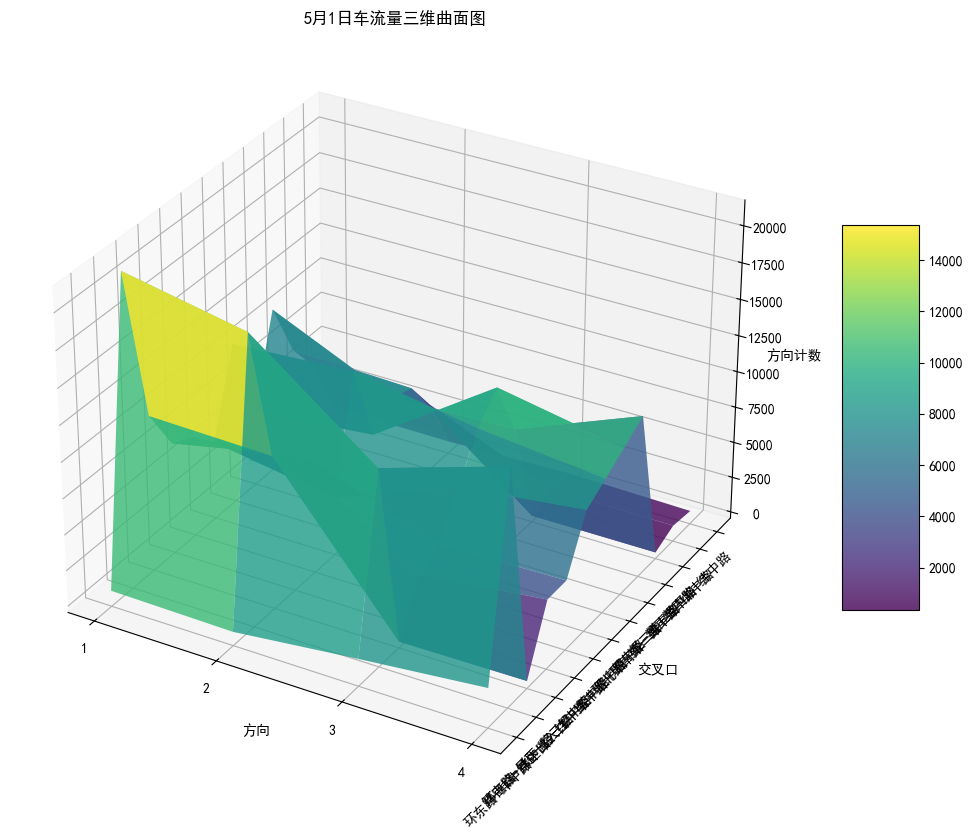

图表已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量三维曲面图.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 读取5月1日的车流量统计数据
file_path = r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量统计.csv'
df = pd.read_csv(file_path, encoding='gbk')

# 设置中文字体以正确显示交叉口名称
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取唯一的交叉口名称和方向
intersections = df['交叉口'].unique()
directions = sorted(df['方向'].unique())

# 创建交叉口名称到索引的映射
intersection_to_idx = {name: i for i, name in enumerate(intersections)}

# 初始化数据矩阵
Z = np.zeros((len(intersections), len(directions)))

# 填充数据矩阵
for _, row in df.iterrows():
    intersection_idx = intersection_to_idx[row['交叉口']]
    direction_idx = row['方向'] - 1  # 方向从1开始，索引从0开始
    Z[intersection_idx, direction_idx] = row['方向计数']

# 创建网格数据
X, Y = np.meshgrid(range(len(directions)), range(len(intersections)))

# 创建三维图
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置坐标轴标签
ax.set_xticks(range(len(directions)))
ax.set_xticklabels(directions)
ax.set_yticks(range(len(intersections)))
ax.set_yticklabels(intersections, rotation=45, ha='right')
ax.set_zlabel('方向计数')
ax.set_xlabel('方向')
ax.set_ylabel('交叉口')

# 设置标题
ax.set_title('5月1日车流量三维曲面图')

# 保存图表
output_path = r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量三维曲面图.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"图表已保存至: {output_path}")

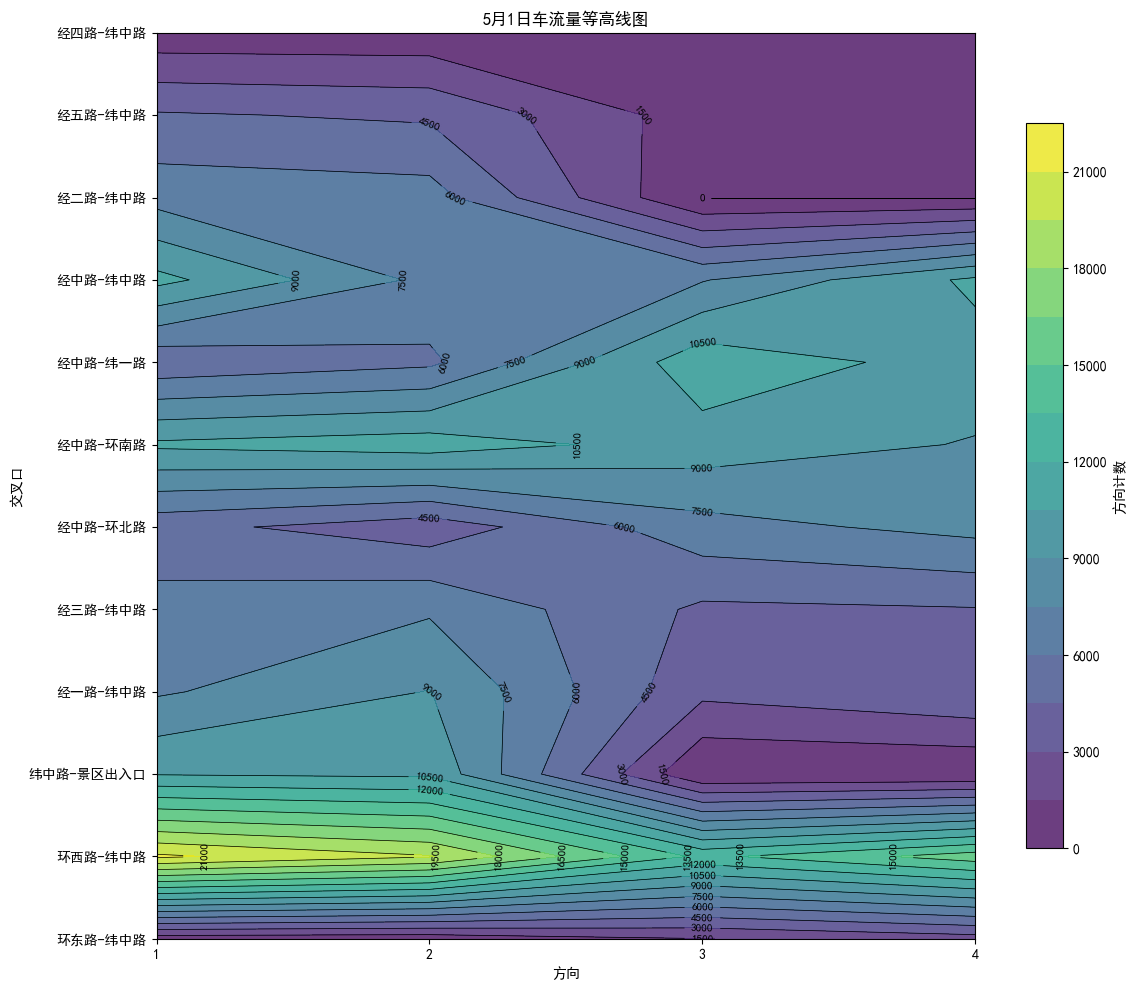

图表已保存至: f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量等高线图.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取5月1日的车流量统计数据
file_path = r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量统计.csv'
df = pd.read_csv(file_path, encoding='gbk')

# 设置中文字体以正确显示交叉口名称
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取唯一的交叉口名称和方向
intersections = df['交叉口'].unique()
directions = sorted(df['方向'].unique())

# 创建交叉口名称到索引的映射
intersection_to_idx = {name: i for i, name in enumerate(intersections)}

# 初始化数据矩阵
Z = np.zeros((len(intersections), len(directions)))

# 填充数据矩阵
for _, row in df.iterrows():
    intersection_idx = intersection_to_idx[row['交叉口']]
    direction_idx = row['方向'] - 1  # 方向从1开始，索引从0开始
    Z[intersection_idx, direction_idx] = row['方向计数']

# 创建网格数据
X, Y = np.meshgrid(range(len(directions)), range(len(intersections)))

# 创建等高线图
fig, ax = plt.subplots(figsize=(12, 10))

# 绘制等高线图
contour = ax.contour(X, Y, Z, levels=15, colors='black', linewidths=0.5)
contourf = ax.contourf(X, Y, Z, levels=15, cmap='viridis', alpha=0.8)

# 添加颜色条
cbar = plt.colorbar(contourf, shrink=0.8)
cbar.set_label('方向计数')

# 添加等高线标签
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f')

# 设置坐标轴标签
ax.set_xticks(range(len(directions)))
ax.set_xticklabels(directions)
ax.set_yticks(range(len(intersections)))
ax.set_yticklabels(intersections, rotation=0)
ax.set_xlabel('方向')
ax.set_ylabel('交叉口')

# 设置标题
ax.set_title('5月1日车流量等高线图')

# 调整布局以防止标签被截断
plt.tight_layout()

# 保存图表
output_path = r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月1日车流量等高线图.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"图表已保存至: {output_path}")

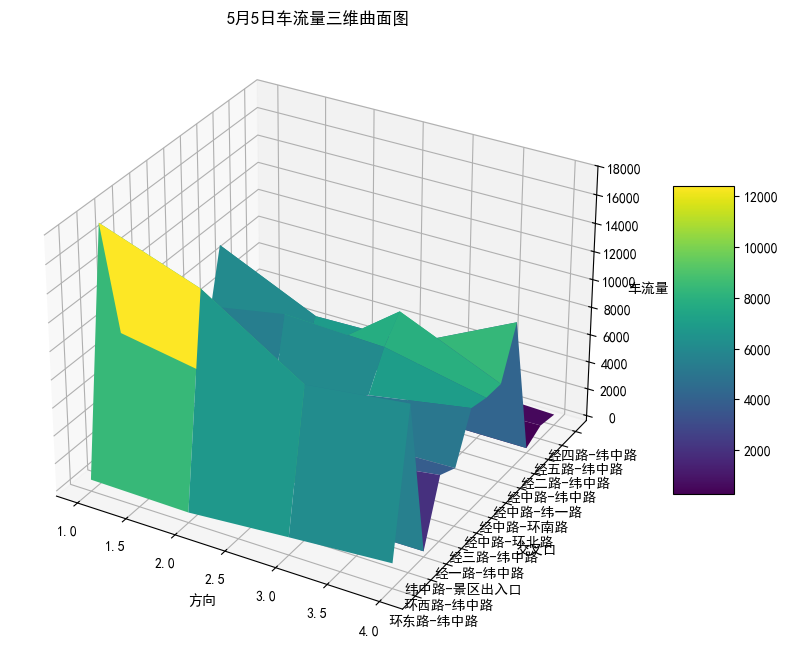

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 读取数据
file_path = r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月2日车流量统计.csv'
df = pd.read_csv(file_path, encoding='gbk')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取唯一的交叉口名称和方向
intersections = df['交叉口'].unique()
directions = sorted(df['方向'].unique())

# 创建网格数据
X, Y = np.meshgrid(directions, range(len(intersections)))

# 创建Z值（车流量）
Z = np.zeros_like(X, dtype=float)
for i, intersection in enumerate(intersections):
    for j, direction in enumerate(directions):
        value = df[(df['交叉口'] == intersection) & (df['方向'] == direction)]['方向计数'].values
        if len(value) > 0:
            Z[i, j] = value[0]

# 创建3D图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# 设置坐标轴标签
ax.set_xlabel('方向')
ax.set_ylabel('交叉口')
ax.set_zlabel('车流量')

# 设置y轴刻度标签为交叉口名称
ax.set_yticks(range(len(intersections)))
ax.set_yticklabels(intersections)

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置标题
ax.set_title('5月2日车流量三维曲面图')

# 保存图像
plt.savefig(r'f:\Math_model\CUMCM2024Problems\E\问题4支撑材料\5月2日车流量三维曲面图.png', dpi=300, bbox_inches='tight')
plt.show()

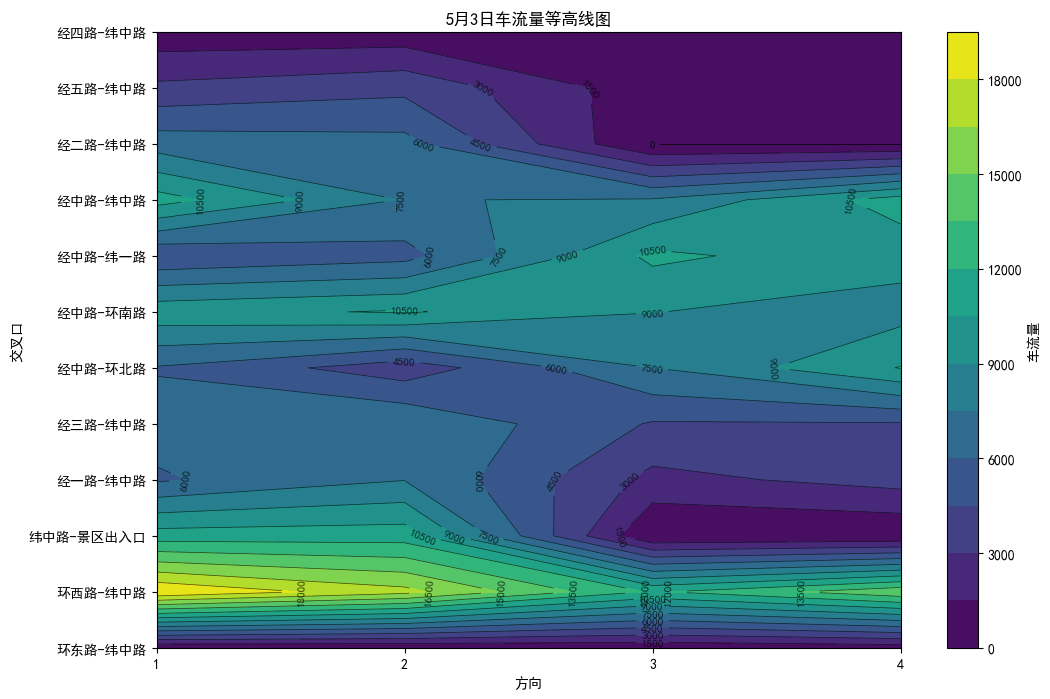

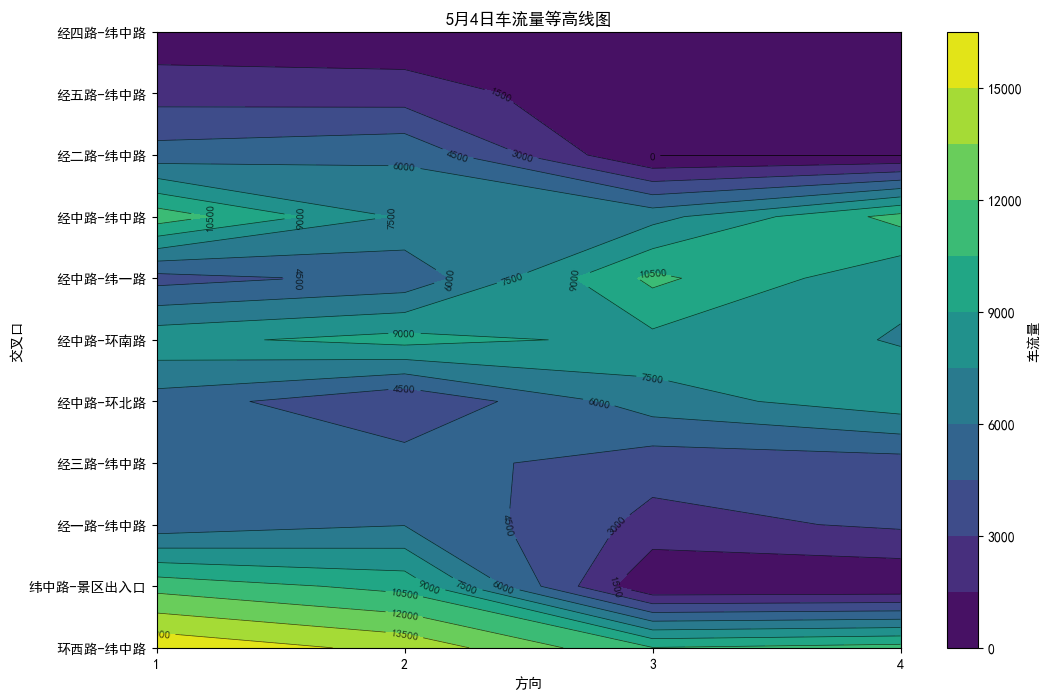

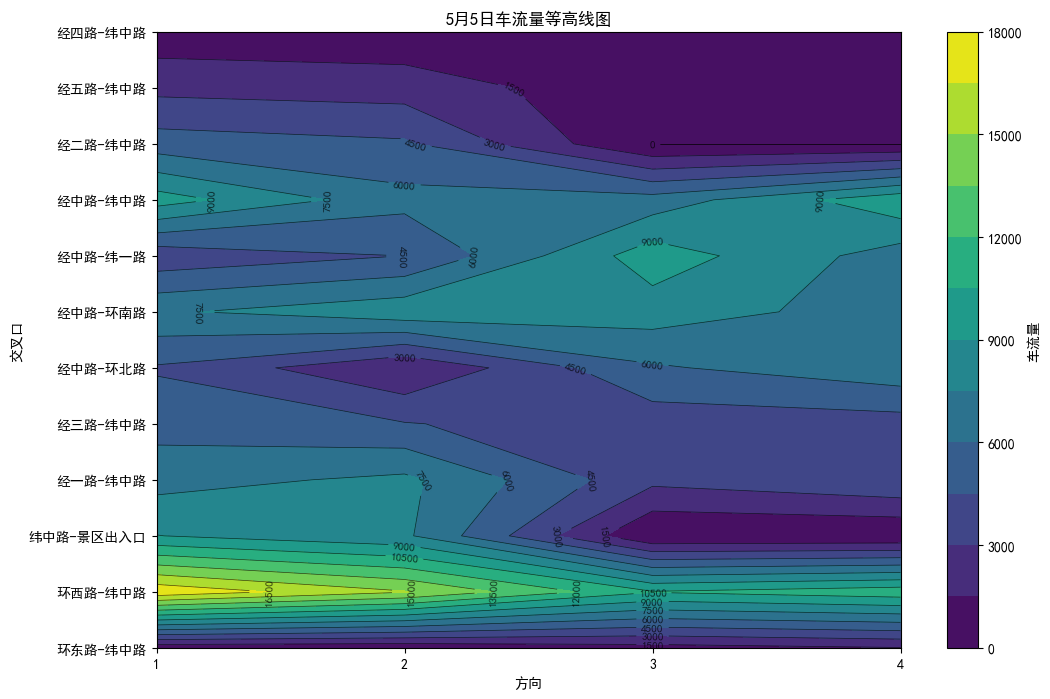

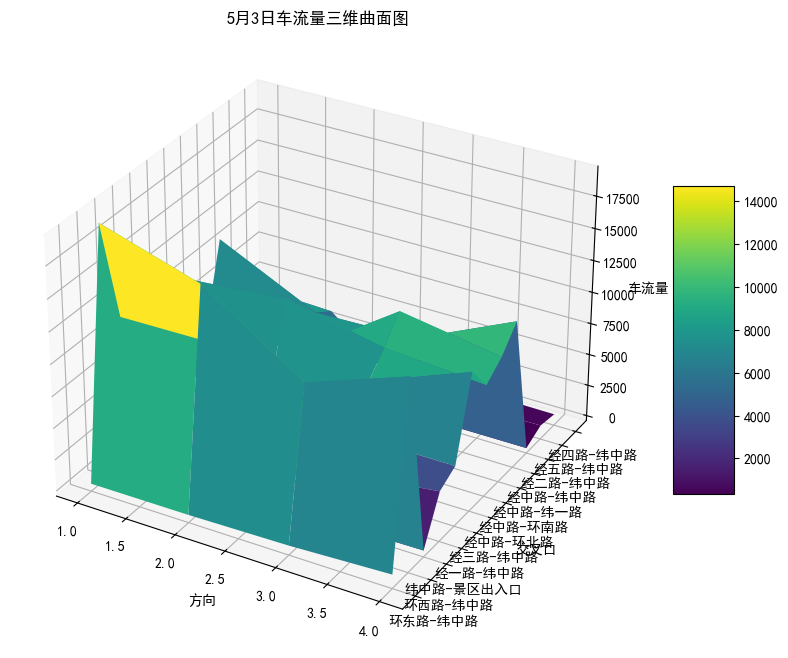

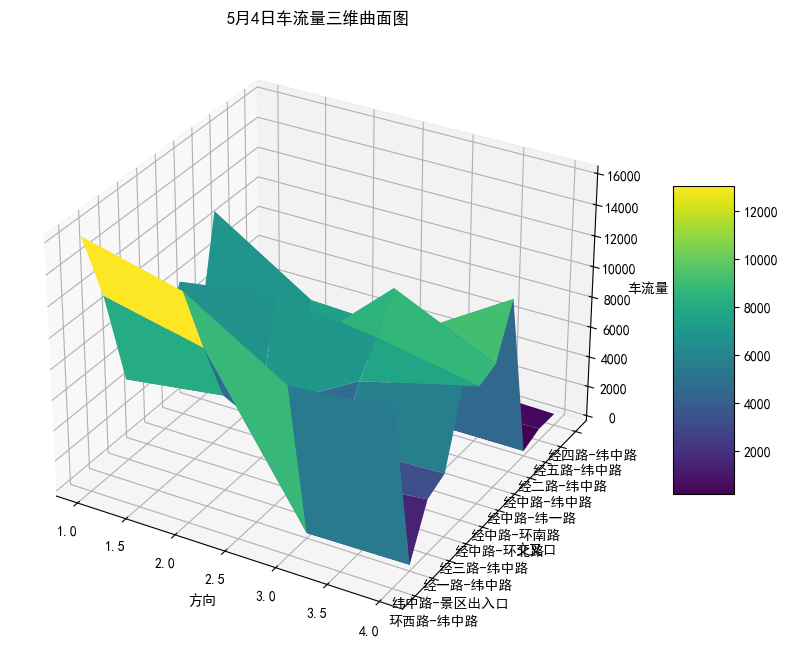

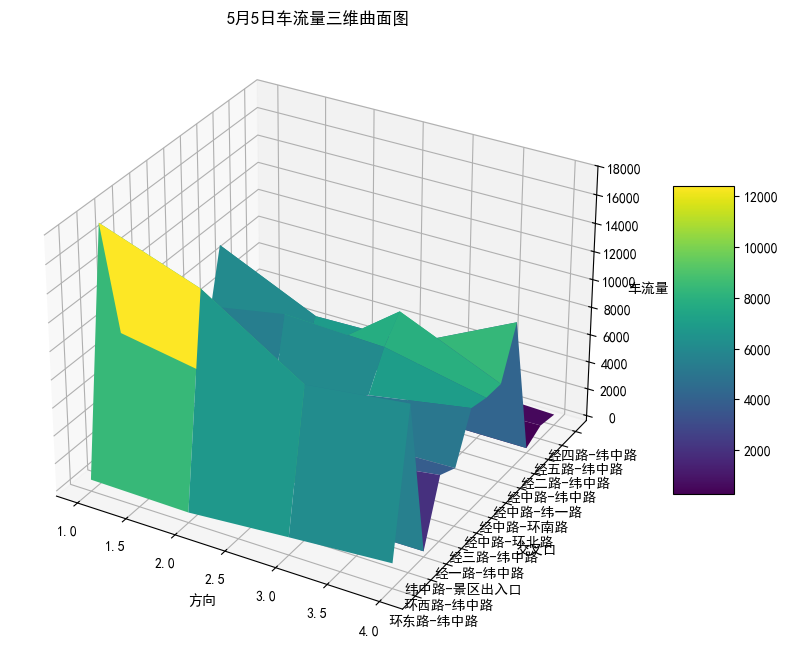

In [2]:
import plot_3d_traffic_contour_may2
import plot_3d_traffic_contour_may3
import plot_3d_traffic_contour_may4
import plot_3d_traffic_contour_may5
import plot_3d_traffic_surface_may3
import plot_3d_traffic_surface_may4
import plot_3d_traffic_surface_may5 

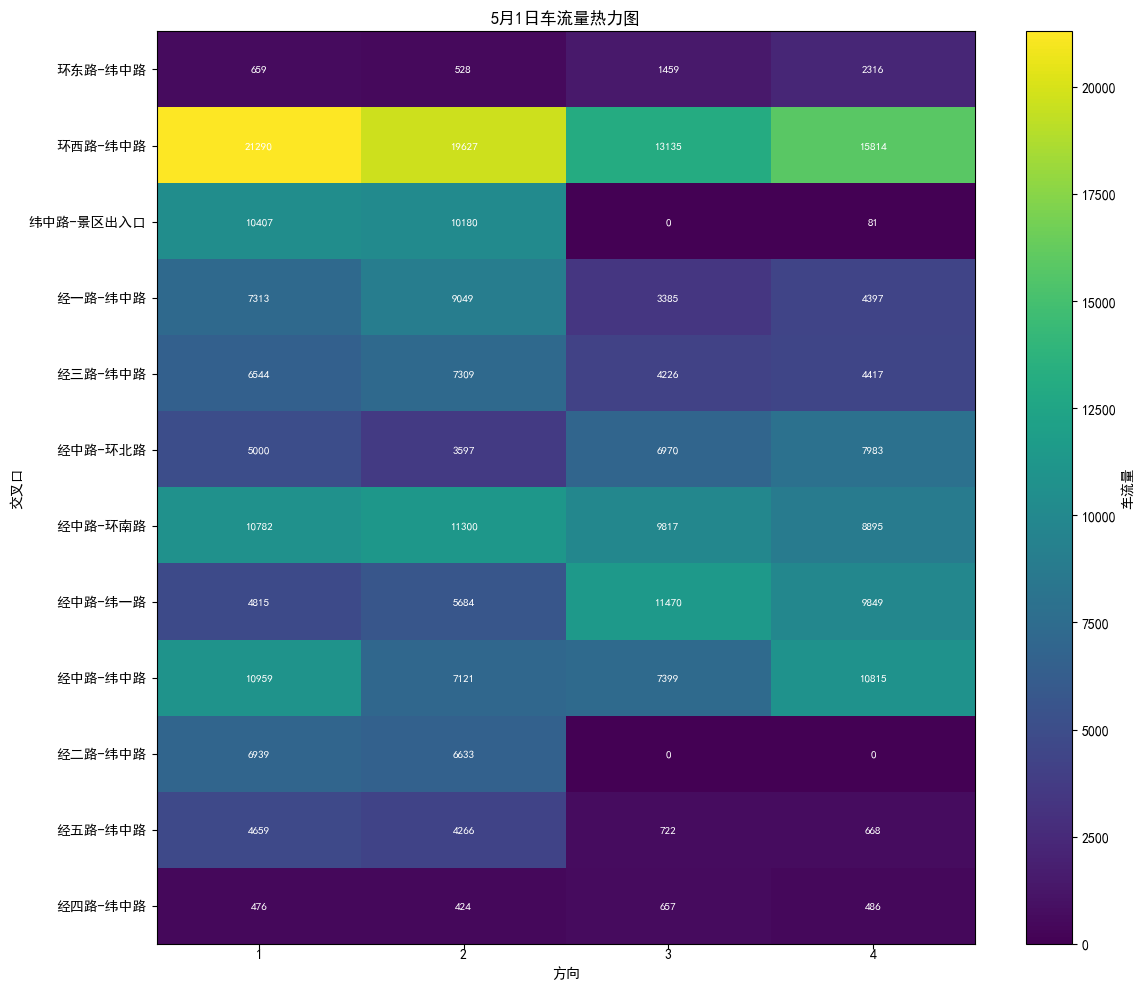

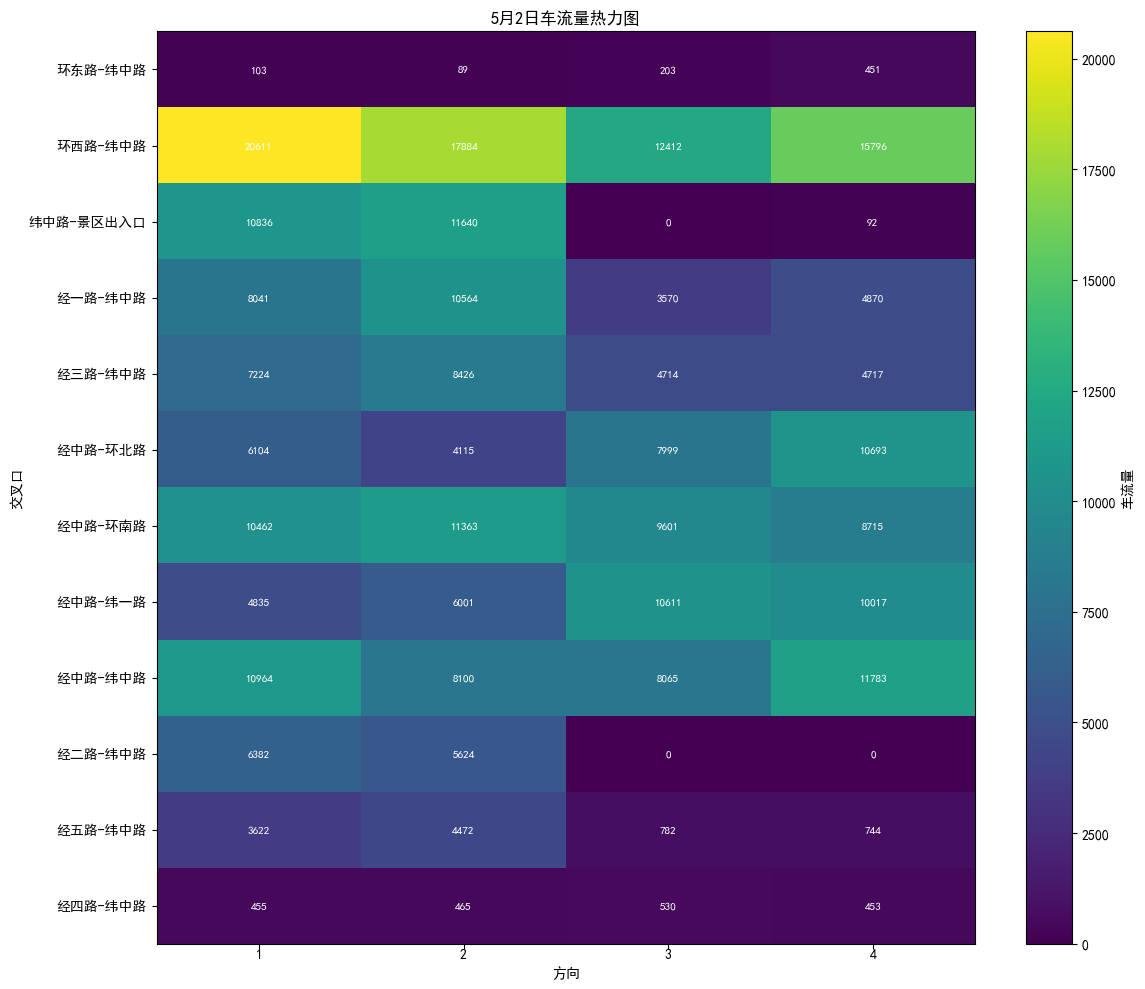

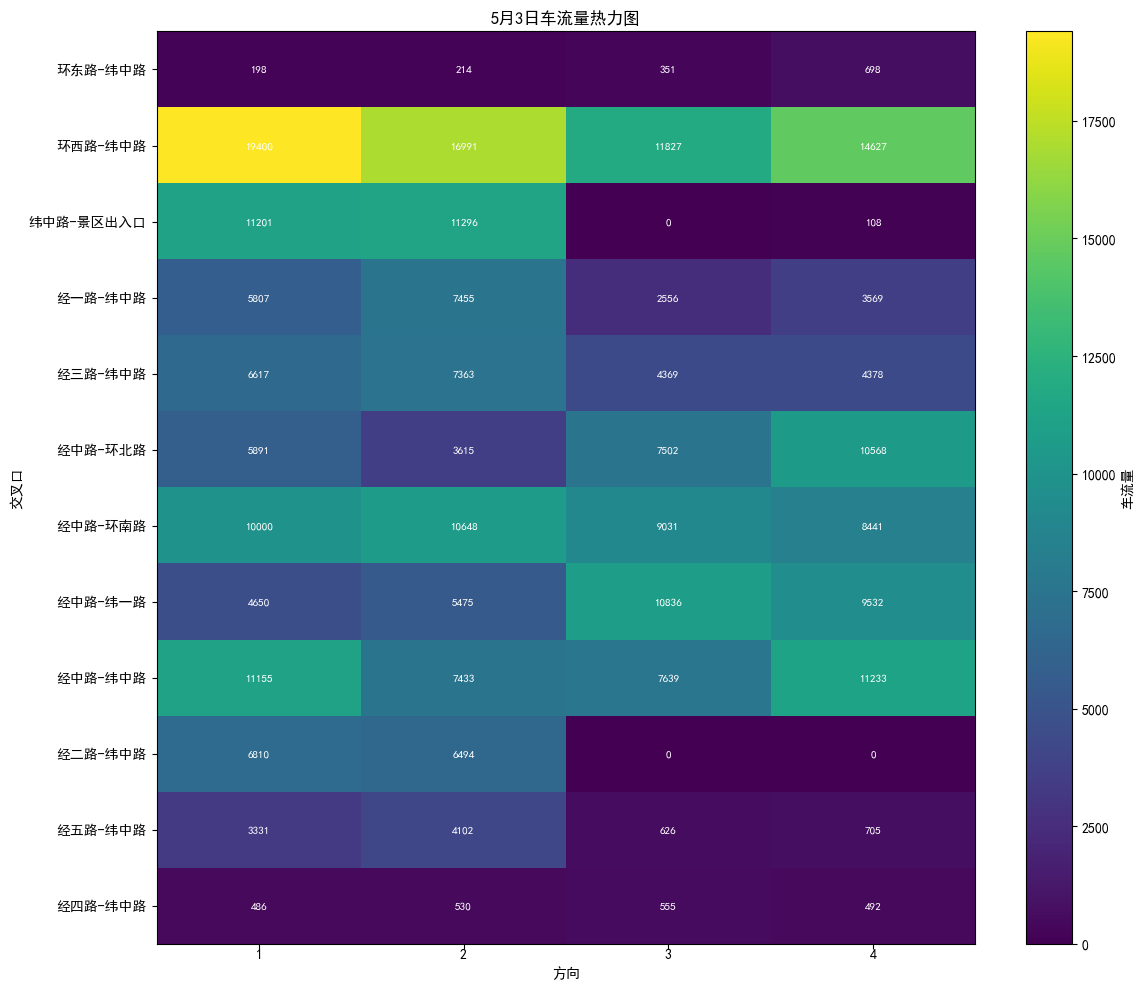

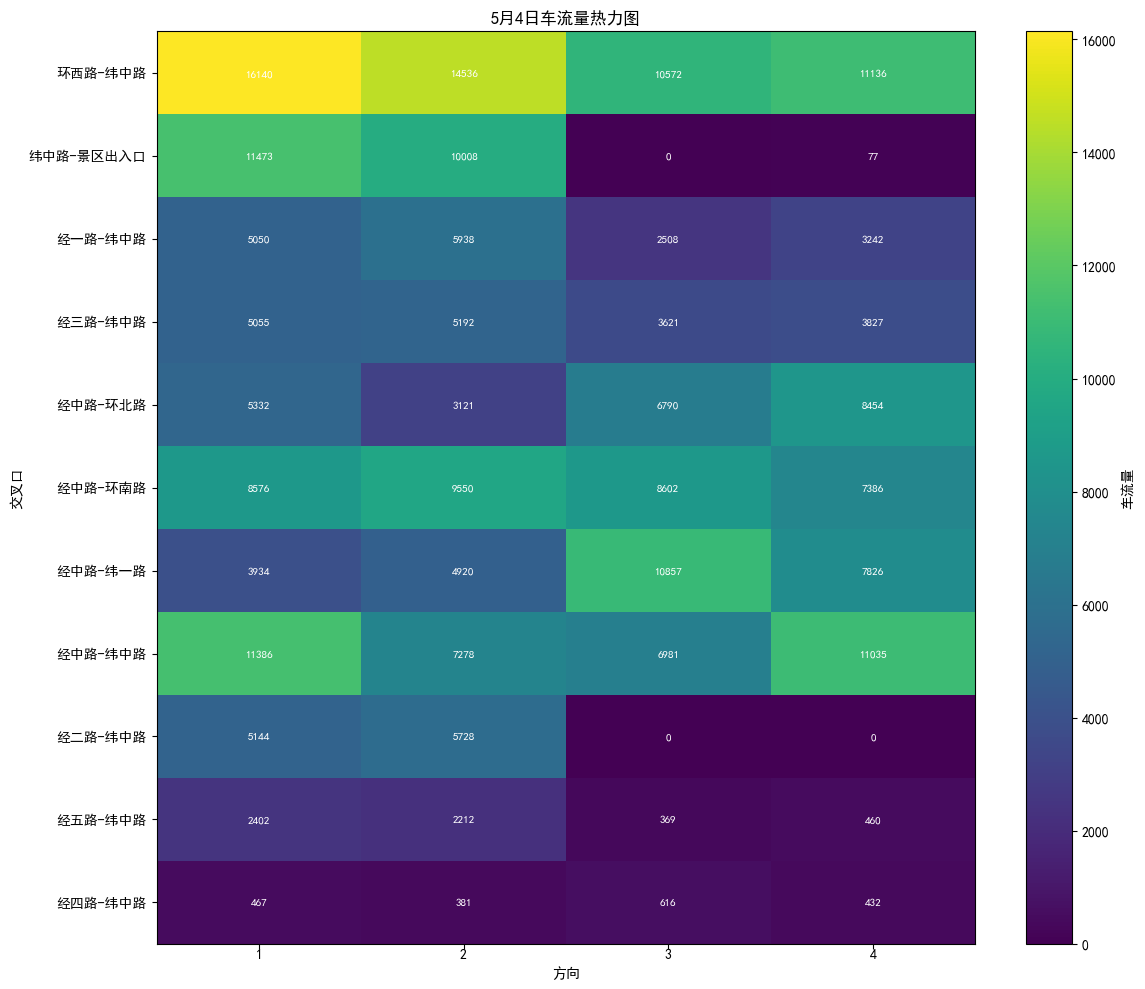

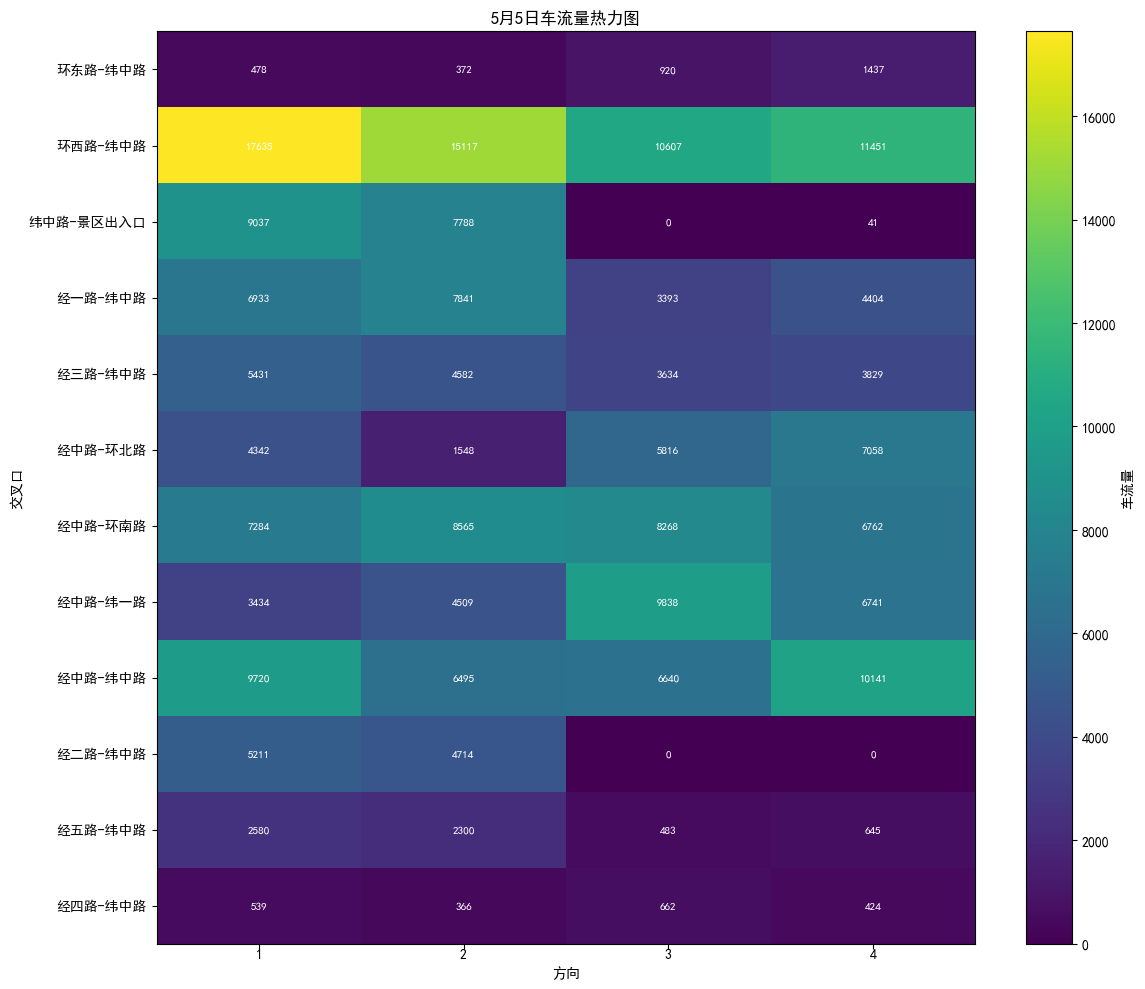

In [1]:
import plot_3d_traffic_heatmap_may1
import plot_3d_traffic_heatmap_may2
import plot_3d_traffic_heatmap_may3
import plot_3d_traffic_heatmap_may4
import plot_3d_traffic_heatmap_may5